# Statistic Analysis Notebook

This notebook was created and tested using the following packages and versions:
* Python 3.6.1
* IPython 5.3.0
* Jupyter Notebook 5.0.0
* Matplotlib 2.0.2
* NumpPy 1.12.1
* IPyWidgets 6.0.0
* SciPy 0.19.0
* Pandas 0.20.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as st
from IPython.display import (display, clear_output)
%matplotlib inline

### Tennis Data Analysis
* In the next cell select the Tennis player to analyze
* The loaded player data will be used in the following cells

In [2]:
global player
player = 'Andy Murray'
data = pd.read_csv("../data/tennis/{player}.csv".
                   format(player=player.replace(' ', '-')))

player_dd = widgets.Dropdown(
    options={'Andy Murray': 'Andy Murray', 
             'Novak Djokovic': 'Novak Djokovic', 
             'Rafael Nadal': 'Rafael Nadal',
             'Roger Federer': 'Roger Federer'},
    value='Andy Murray',
    description='Player Name')

def player_dd_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global player
        clear_output()
        player = change['new']
        data = pd.read_csv("../data/tennis/{player}.csv".
                           format(player=player.replace(' ', '-')))
        display(data.head())
        
player_dd.observe(player_dd_on_change)
display(player_dd)

year          tournament  start date type         surface      draw  \
0  2005  Basel, Switzerland  24.10.2005   WS  Indoor: Carpet  Draw: 32   
1  2005  Basel, Switzerland  24.10.2005   WS  Indoor: Carpet  Draw: 32   
2  2005  Basel, Switzerland  24.10.2005   WS  Indoor: Carpet  Draw: 32   
3  2005       Mons, Belgium  03.10.2005   CH  Indoor: Carpet  Draw: 32   
4  2005       Mons, Belgium  03.10.2005   CH  Indoor: Carpet  Draw: 32   

  atp points  atp ranking tournament prize money round  \
0         60           70                $29,000   R32   
1         60           70                $29,000   R16   
2         60           70                $29,000     Q   
3         21           72                 $3,650   R32   
4         21           72                 $3,650   R16   

             ...             player2 2nd serve return points total  \
0            ...                                              41.0   
1            ...                                              54.0   
2            ...                                              35.0   
3            ...                                               NaN   
4            ...                                               NaN   

  player2 break points converted won player2 break points converted total  \
0                                3.0                                  4.0   
1                                2.0                                 11.0   
2                                3.0                                 13.0   
3                                NaN                                  NaN   
4                                NaN                                  NaN   

  player2 return games played player2 total service points won  \
0                        16.0                             60.0   
1                        14.0                             50.0   
2                        13.0                             50.0   
3                         NaN                              NaN   
4                         NaN                              NaN   

  player2 total service points total  player2 total return points won  \
0                               97.0                             33.0   
1                               73.0                             45.0   
2                               67.0                             30.0   
3                                NaN                              NaN   
4                                NaN                              NaN   

  player2 total return points total player2 total points won  \
0                              94.0                     93.0   
1                             114.0                     95.0   
2                              85.0                     80.0   
3                               NaN                      NaN   
4                               NaN                      NaN   

  player2 total points total  
0                      191.0  
1                      187.0  
2                      152.0  
3                        NaN  
4                        NaN  

[5 rows x 70 columns]

### Year Statistics
The next cell can view different player stats by year.
The stats include:
* Wins
* Aces 
* Total Points

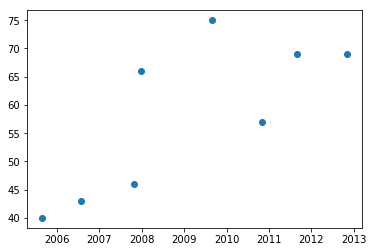

In [3]:
data['win'] = data['winner'] == player
grp = data.groupby('year')
plt.plot_date(grp['start date'].max(), grp['win'].sum())

stat_dd = widgets.Dropdown(
    options={'Wins': 1, 
             'Aces': 2, 
             'Total Points': 3},
    value=1,
    description='Stat')

def stat_dd_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        stat = change['new']
        if stat == 1:
            plt.plot_date(grp['start date'].max(), grp['win'].sum())
        elif stat == 2:
            plt.plot_date(grp['start date'].max(),
                          grp['player1 aces'].sum())
        else:
            plt.plot_date(grp['start date'].max(),
                          grp['player1 total points total'].sum())
        
stat_dd.observe(stat_dd_on_change)
display(stat_dd)

### Data Correlation
* The following cells can be used to determine a correlation in the tennis data

(0.0, 0.17307692307692307)

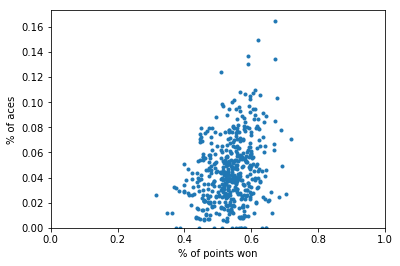

In [4]:
npoints = data['player1 total points total']
points = data['player1 total points won'] / npoints
aces = data['player1 aces'] / npoints
plt.plot(points, aces, '.')
plt.xlabel('% of points won')
plt.ylabel('% of aces')
plt.xlim(0., 1.)
plt.ylim(0.)

In [5]:
data_cor = pd.DataFrame({'points': points, 'aces': aces}).dropna()
data_cor.corr()

aces    points
aces    1.000000  0.288831
points  0.288831  1.000000

In [6]:
data_cor['result'] = data_cor['points'] > data_cor['points'].median()
data_cor['manyaces'] = data_cor['aces'] > data_cor['aces'].median()

In [7]:
pd.crosstab(data_cor['result'], data_cor['manyaces'])

manyaces  False  True 
result                
False       143    101
True        102    141

In [8]:
chi2, p, dof, expected = st.chi2_contingency(_)
if p < 0.05:
    print("The data is not statistically significantly correlated")
else:
    print("The data is statistically significantly correlated")

The data is not statistically significantly correlated
